<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-знакомство-с-данными" data-toc-modified-id="Загрузка-и-знакомство-с-данными-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и знакомство с данными</a></span><ul class="toc-item"><li><span><a href="#Выводы-по-знакомству-с-данными" data-toc-modified-id="Выводы-по-знакомству-с-данными-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы по знакомству с данными</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Переименуем-столбцы" data-toc-modified-id="Переименуем-столбцы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Переименуем столбцы</a></span></li><li><span><a href="#Дубликаты" data-toc-modified-id="Дубликаты-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Дубликаты</a></span></li><li><span><a href="#Изменим-типы-данных" data-toc-modified-id="Изменим-типы-данных-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Изменим типы данных</a></span></li><li><span><a href="#Вывод-по-предобработке" data-toc-modified-id="Вывод-по-предобработке-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод по предобработке</a></span></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Модель-на-матрице-признаков-X" data-toc-modified-id="Модель-на-матрице-признаков-X-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Модель на матрице признаков X</a></span></li><li><span><a href="#Модель-на-произведении-матрицы-признакаов-X-и-обратимой-матрицы-P" data-toc-modified-id="Модель-на-произведении-матрицы-признакаов-X-и-обратимой-матрицы-P-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Модель на произведении матрицы признакаов X и обратимой матрицы P</a></span></li><li><span><a href="#Сравним-модели" data-toc-modified-id="Сравним-модели-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>Сравним модели</a></span></li></ul></li><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></div>

* Знакомство с данными
    * Выявим проблемы в наших данных
* Предобработка
    * Исправим неточности которые были в наших данных
* Умножение матриц
    * Нам нужно определить изменится ли качество линейной регрессии если мы умножим матрицу признаков на обратимую матрицу
* Алгоритм преобразования
    * Подтвердим наш вывод из прошлого пункта с помощью написания функций на языке программирования
* Проверка алгоритма
    * Проверьте, качество линейной регрессии из sklearn до и после преобразования c помощью метрики R2.

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка и знакомство с данными

Загрузим необходимые для работы библиотеки

In [1]:
import pandas as pd
pd.set_option('display.float_format', '{:.3f}'.format)

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

Загрузим наши данные и сохраним их в переменную: **df**

In [2]:
df = pd.read_csv('insurance.csv')

Посмотрим на первый 5 строк нашего датафрейма

In [3]:
df.head(5)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.000,49600.000,1,0
1,0,46.000,38000.000,1,1
2,0,29.000,21000.000,0,0
3,0,21.000,41700.000,2,0
4,1,28.000,26100.000,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


* Пропусков в данных нет 
* Можно изменить тип данных в колонке **Возраст**
* Можно привести названия колонок к стилю *snake_case*

Посмотрим как распределенны наши данные

In [5]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000,5000.000,5000.000,5000.000,5000.000
mean,0.499,30.953,39916.360,1.194,0.148
std,0.500,8.441,9900.084,1.091,0.463
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33300.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


Построим гистограммы и посмотим на распределенние данных

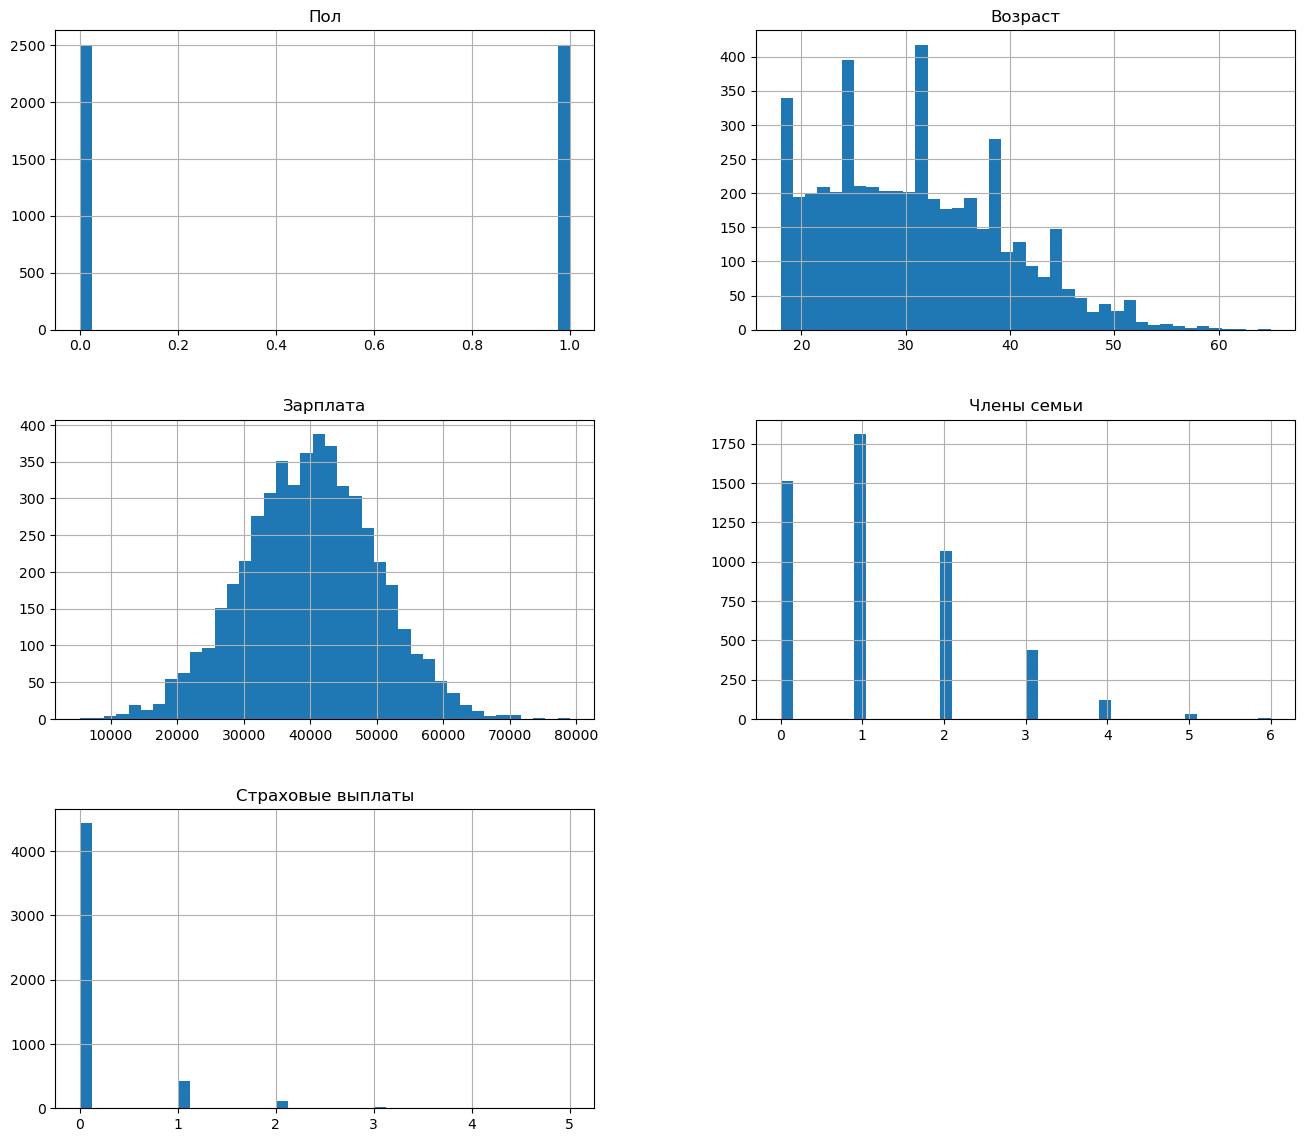

In [6]:
df.hist(bins=40, figsize=(16,14));

Проверим данные на мультиколлинеарность

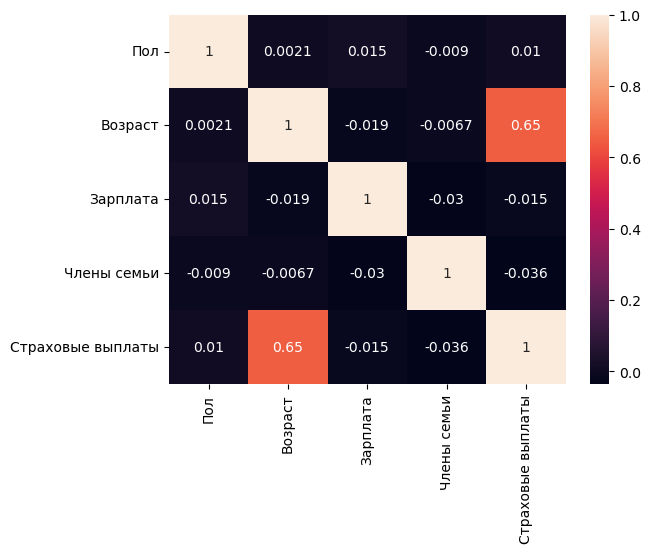

In [7]:
sns.heatmap(df.corr(),annot=True);

### Выводы по знакомству с данными
* Мы загрузили нужные нам для выполнения работы библиотеки и данные, которые храняться в датафрейме **df**
* Пропусков в данных не было обнаруженно
* Можно изменить тип данных в колонке **Возраст**
* Можно привести названия колонок к стилю *snake_case*
* Мульиколлинеарности нет

## Предобработка данных

### Переименуем столбцы 

Приведем столбцы к стилю snake_case

In [8]:
df.columns = ['пол', 'возраст', 'зарплата', 'члены_семьи', 'страховые_выплаты']

### Дубликаты

Проверим наш датафрейм на дубликаты

In [9]:
df.duplicated().sum()

153

В наших данных присутствуют 153 явных дубликата избавимся от них

In [10]:
df = df.drop_duplicates().reset_index(drop=True)

Мы избавились от явных дубликатов

### Изменим типы данных

Посмотрим на типы данных в нашем датафрейме

In [11]:
df.dtypes

пол                    int64
возраст              float64
зарплата             float64
члены_семьи            int64
страховые_выплаты      int64
dtype: object

In [12]:
df.describe()

,пол,возраст,зарплата,члены_семьи,страховые_выплаты
count,4847.000,4847.000,4847.000,4847.000,4847.000
mean,0.498,31.024,39895.812,1.203,0.152
std,0.500,8.488,9972.954,1.099,0.469
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33200.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


пол: int64 -> unit8 \
возраст: float64 -> unit8 \
члены_семьи: int64 -> unit8 \
страховые_выплаты: int64 -> unit8 \
Посмотрим сколько весил наш датафрейм

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   пол                4847 non-null   int64  
 1   возраст            4847 non-null   float64
 2   зарплата           4847 non-null   float64
 3   члены_семьи        4847 non-null   int64  
 4   страховые_выплаты  4847 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 189.5 KB


In [14]:
df['пол'] = df['пол'].astype('uint8')
df['возраст'] = df['возраст'].astype('uint8')
df['члены_семьи'] = df['члены_семьи'].astype('uint8')
df['страховые_выплаты'] = df['страховые_выплаты'].astype('uint8')

In [15]:
df.dtypes

пол                    uint8
возраст                uint8
зарплата             float64
члены_семьи            uint8
страховые_выплаты      uint8
dtype: object

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4847 entries, 0 to 4846
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   пол                4847 non-null   uint8  
 1   возраст            4847 non-null   uint8  
 2   зарплата           4847 non-null   float64
 3   члены_семьи        4847 non-null   uint8  
 4   страховые_выплаты  4847 non-null   uint8  
dtypes: float64(1), uint8(4)
memory usage: 56.9 KB


Мы изменили типы данных, что увеличить нашу вычислительную производительность

### Вывод по предобработке
* Мы переменавали столбцы нашего датафрейма
* Удалили дубликаты 
* Изменили типы данных у колонок:
    * пол: int64 -> unit8 \
    * возраст: float64 -> unit8 \
    * члены_семьи: int64 -> unit8 \
    * страховые_выплаты: int64 -> unit8 \

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:**  Если признаки умножают на обратимую матрицу качество линейной регрессии не измениться

**Обоснование:** 

Заменим матрицу признаков $X$ в формуле обучения ($w_n = (X^T X)^{-1} X^T y$) на матрицу признаков $X$ умноженную на обратимую матрицу $P$


$$w_n = ((XP)^T XP)^{-1} (XP)^T y$$ 

Раскроем скобки с помощью свойства матриц $(AB)^T = B^T A^T$

$$w_n = ( P^T X^T XP)^{-1}P^T X^T y$$


Раскроем скобки с помощью свойства матриц $(AB)^{-1} = B^{-1}A^{-1}$, $(ABC)^T=((AB)C)^T=C^T(AB)^T=C^TB^TA^T$

$$w_n = P^{-1} (X^T X)^{-1}  (P^T)^{-1}  P^T X^T y$$

Так как $P$ это обратимая матрица можем воспользоваться свойством $AA^{-1} = E$, по этому сократим $(P^T)^{-1} P^T$ и получим единичную матрицу и сразу отбросим ее по свойству $AE=EA=A$ 

$$w_n = P^{-1} (X^T X)^{-1} X^T y$$

Заменим $(X^T X)^{-1} X^T y$ в нашей формуле на $w$, так как  $w = (X^T X)^{-1} X^T y$

$$w_n = P^{-1}w $$

Напишем формулу предсказания $a_n$ по формуле $a = Xw$ не забудем что в данной формуле $X$ = $XP$, а $w$  = $w_n$

$$a_n = XPw_n$$

Заменим $w_n$ на $P^{-1}w $, так как $w_n = P^{-1}w $ 
$$a_n = X P P^{-1}w$$

Заменим $PP^{-1}$ на $E$, по свойствам матриц $AA^{-1} = E$, отбросим еденичную матрицу $AE=EA=A$.

$$a_n = Xw$$

Мы получили $a_n = Xw$, так же мы имеем $a = Xw$ из условия,  мы можем заметить что формулы $a_n$, $a$  одинаковы, а значит качество линейной регрессии не измениться

## Алгоритм преобразования

**Алгоритм**

Создадим матрицу и проверим её на обратимость

In [17]:
P = np.random.normal(size=(4, 4))
P

array([[-0.8127522 ,  1.75173985, -0.7572332 , -0.95116785],
       [ 2.21319202,  0.10848104,  1.6772702 , -0.49003479],
       [ 0.07238181,  2.15858278, -0.01621394,  0.23789759],
       [-1.20435851,  1.20089467, -0.8079123 , -0.14590461]])

In [18]:
np.linalg.inv(P)

array([[ 1.61944020e+00, -1.31923489e+00,  1.13286183e+00,
        -4.27939445e+00],
       [-5.17706228e-03,  1.08064034e-01,  3.38303098e-01,
         2.22409786e-01],
       [-2.31283460e+00,  2.20467152e+00, -1.31227395e+00,
         5.53335073e+00],
       [-6.03381729e-01, -4.28882601e-01,  6.99750817e-01,
        -3.38894512e-01]])

Матрица обратимая

Создадим матрицу признаков $X$ и $y$ вектор целевого признака

In [19]:
X = df.drop('страховые_выплаты', axis=1).values
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

In [20]:
y = df['страховые_выплаты']
y

0       0
1       1
2       0
3       0
4       0
       ..
4842    0
4843    0
4844    0
4845    0
4846    0
Name: страховые_выплаты, Length: 4847, dtype: uint8

Напишем формулу умнажения матрицы признаков на обратимую матрицу $XP$

In [21]:
XP = X@P
XP

array([[  3678.86176298, 107073.10618478,   -737.00842335,
         11778.53210043],
       [  2851.11142674,  82032.3366162 ,   -539.78315098,
          9017.42101874],
       [  1584.20067383,  45333.38430455,   -291.85187538,
          4981.6384384 ],
       ...,
       [  2495.59863604,  73180.52761091,   -517.72294019,
          8054.63588842],
       [  2411.14973194,  70593.39787296,   -496.47681893,
          7767.08163512],
       [  2998.6539359 ,  87644.45092224,   -612.8874883 ,
          9643.82421814]])

Напишем формулу $w$

In [22]:
w = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
w

array([-4.39473393e-02,  2.35998538e-02, -1.18490564e-05, -4.71380350e-02])

Напишем формулу $a$

In [23]:
a = X@w
a

array([ 0.28879544,  0.5881911 ,  0.43556558, ..., -0.023962  ,
       -0.0536288 ,  0.08863884])

Напишем формулу для $w_n$

In [24]:
w_n = np.linalg.inv(XP.T.dot(XP)).dot(XP.T).dot(y)
w_n

array([ 0.09940499, -0.00771016, -0.10714289,  0.03236198])

Напишем формулу для $a_n$

In [25]:
a_n = XP@w_n
a_n

array([ 0.28879544,  0.5881911 ,  0.43556558, ..., -0.02396201,
       -0.05362881,  0.08863884])

Посмотрим на разницу между $a$ и $a_n$

In [26]:
print('Разница между предсказаниями:', (np.round(a,5) - np.round(a_n,5)).sum())

Разница между предсказаниями: 1.999999999999615e-05


**Обоснование**
Разность между $a_n$ и $a$ слишком мала, что может нам говорить что $a_n$ и $a$ почти одинаковы

## Проверка алгоритма

Напишем модель для $X$ и $XP$ и сравним их по метрике r2_score

### Модель на матрице признаков X

In [27]:
model_X = LinearRegression()

Обучим модель на $X$

In [28]:
model_X.fit(X, y)

LinearRegression()

Получим предсказания по модели обученной на признаках $X$

In [29]:
predict_X = model_X.predict(X)

### Модель на произведении матрицы признакаов X и обратимой матрицы P 

In [30]:
model_XP = LinearRegression()

Обучим модель на $XP$

In [31]:
model_XP.fit(XP, y)

LinearRegression()

Получим предсказания по модели обученной на признаках $XP$

In [32]:
predict_XP = model_X.predict(X)

### Сравним модели

In [33]:
print(f'r2_score на матрице X', -r2_score(predict_X, y))
print(f'r2_score на матрице XP', -r2_score(predict_XP, y))

r2_score на матрице X 0.32449480492645333
r2_score на матрице XP 0.32449480492645333


Как мы можем заметить качество линейной регрессии из sklearn не отличается до и после преобразования на метрике R2.

## Вывод:
* Знакомство с данными
    * С данными в основном все было в порядке
* Предобработка
    * Привели столбцы к формату *snake_case*
    * Убрали дубликаты
    * Изменили типы данных
* Умножение матриц
    * Мы выяснили, что если признаки умножают на обратимую матрицу качество линейной регрессии не измениться.
* Алгоритм преобразования
    * Мы подтвердили, то что качество линейной регрессии не измениться с помощью написания всех функций на языке программирования
* Проверка алгоритма
    * Мы создали две модели обученные на матрице признаков и матрице признаков умноженной на обратимую матрицу
    * Наши модели показали одинаковые результаты на метрике r2_score